In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd
import numpy as np

In [4]:
od.download('https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset


100%|██████████| 187k/187k [00:00<00:00, 60.1MB/s]

In [5]:
os.listdir('bank-customer-churn-dataset')

['Bank Customer Churn Prediction.csv']

In [6]:
data=pd.read_csv('/content/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data=data.drop('customer_id',axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
data.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
gen={'Female':0,'Male':1}
data.gender=data.gender.map(gen)

In [13]:
con={'France':0,'Spain':1,'Germany':0.5}
data.country=data.country.map(con)

In [14]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0.0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1.0,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1.0,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  float64
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 859.5 KB


In [17]:
import matplotlib.pyplot as plt

(array([4543.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5457.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

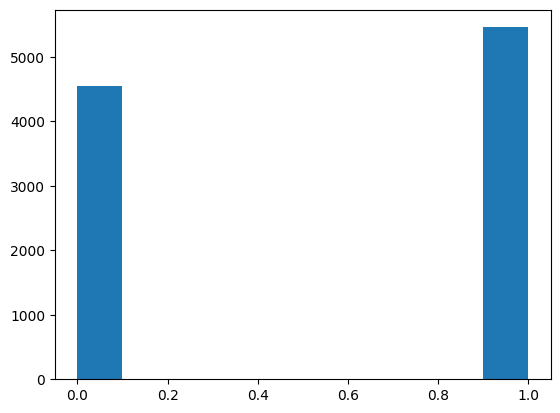

In [20]:
plt.hist(data.gender)

(array([5014.,    0.,    0.,    0.,    0., 2509.,    0.,    0.,    0.,
        2477.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

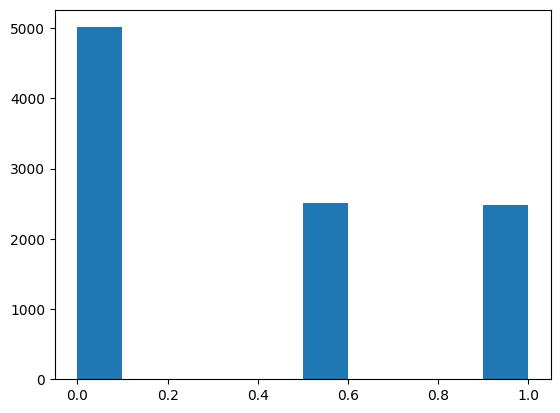

In [21]:
plt.hist(data.country)

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

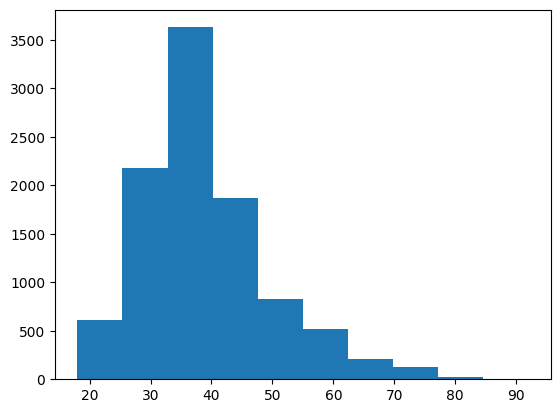

In [22]:
plt.hist(data.age)

In [23]:
cols_to_scale=['credit_score','balance','age','estimated_salary']

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data[cols_to_scale]=scaler.fit_transform(data[cols_to_scale])

In [25]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.538,0.0,0,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,1.0,0,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.304,0.0,0,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.698,0.0,0,0.283784,1,0.000000,2,0,0,0.469120,0
4,1.000,1.0,0,0.337838,2,0.500246,1,1,1,0.395400,0


In [26]:
x=data.drop('churn',axis=1)
y=data['churn']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train.shape

(8000, 10)

In [29]:
x_test.shape

(2000, 10)

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [32]:
model=Sequential([
    Dense(16,input_dim=10,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7509 - loss: 0.5446
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4876
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7942 - loss: 0.4816
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7963 - loss: 0.4656
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7935 - loss: 0.4679
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8014 - loss: 0.4564
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8039 - loss: 0.4463
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 0.4412
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8175 - loss: 0.4296
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8215 - loss: 0.4198
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8257 - loss: 0.4121
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [35]:
preds=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [48]:
y_preds=[]
for i in preds:
  if i<=0.5:
    y_preds.append(0)
  else:
    y_preds.append(1)

In [49]:
y_test=np.array(y_test)

In [50]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [51]:
y_preds[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
classification_report(y_test,y_preds)

'              precision    recall  f1-score   support\n\n           0       0.87      0.96      0.91      1607\n           1       0.73      0.42      0.53       393\n\n    accuracy                           0.86      2000\n   macro avg       0.80      0.69      0.72      2000\nweighted avg       0.84      0.86      0.84      2000\n'

<Axes: >

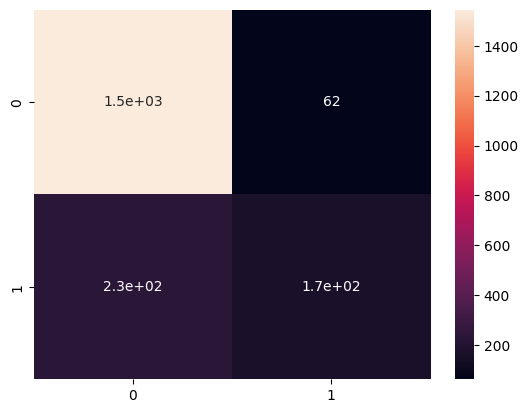

In [55]:
cf=confusion_matrix(y_test,y_preds)
import seaborn as sns
sns.heatmap(cf,annot=True)